In [1]:
# TMO rk1 Валиков Илья

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [3]:
data = pd.read_csv('toy_dataset.csv', sep=",")

In [4]:
data.shape

(150000, 6)

In [5]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [6]:
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

### тк столбец "Number" не нужен для корреляции, можем удалить его

In [8]:
data = data.drop(columns=['Number'], axis=1)

In [9]:
data.head()

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


### Проверим уникальные значения для каждых столбцов

In [11]:
data['City'].unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [12]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
data['Age'].unique()

array([41, 54, 42, 40, 46, 36, 32, 39, 51, 30, 48, 47, 61, 43, 27, 38, 35,
       57, 33, 58, 64, 44, 34, 45, 55, 63, 59, 26, 56, 62, 31, 49, 53, 29,
       28, 25, 37, 65, 60, 50, 52], dtype=int64)

In [14]:
data['Income'].unique()

array([ 40367.,  45084.,  52483., ..., 107123.,  62501.,  77823.])

In [15]:
data['Illness'].unique()

array(['No', 'Yes'], dtype=object)

### Столбцы "City", "Gender" и "Illness" можно отнести к категориальным признакам. С помощью библиотеки LabelEncoder закодируем категориальные признаки в числовые.

In [17]:
from sklearn.preprocessing import LabelEncoder

### Преобразуем столбец "City"

In [19]:
letypecity = LabelEncoder()
learrcity = letypecity.fit_transform(data["City"])
data["City"] = learrcity
data = data.astype({"City":"int64"})

### Проверим изменения

In [21]:
np.unique(learrcity)

array([0, 1, 2, 3, 4, 5, 6, 7])

### Аналогично преобразуем столбцы "Gender" и "Illness"

In [23]:
letypegender = LabelEncoder()
learrgender = letypegender.fit_transform(data["Gender"])
data["Gender"] = learrgender
data = data.astype({"Gender":"int64"})

In [24]:
np.unique(learrgender)

array([0, 1])

In [25]:
letypeill = LabelEncoder()
learrill = letypeill.fit_transform(data["Illness"])
data["Illness"] = learrill
data = data.astype({"Illness":"int64"})

In [26]:
np.unique(learrill)

array([0, 1])

### Проверим типы данных

In [28]:
data.dtypes

City         int64
Gender       int64
Age          int64
Income     float64
Illness      int64
dtype: object

### **корреляционный анализ**

### выберем в качестве целевого признака гендер

In [30]:
data.corr()

,City,Gender,Age,Income,Illness
City,1.000000,0.002188,-0.000636,0.234541,-0.001712
Gender,0.002188,1.000000,-0.003653,0.198888,0.001297
Age,-0.000636,-0.003653,1.000000,-0.001318,0.001811
Income,0.234541,0.198888,-0.001318,1.000000,0.000298
Illness,-0.001712,0.001297,0.001811,0.000298,1.000000


### Визуализируем с помощью тепловой карты

<Axes: >

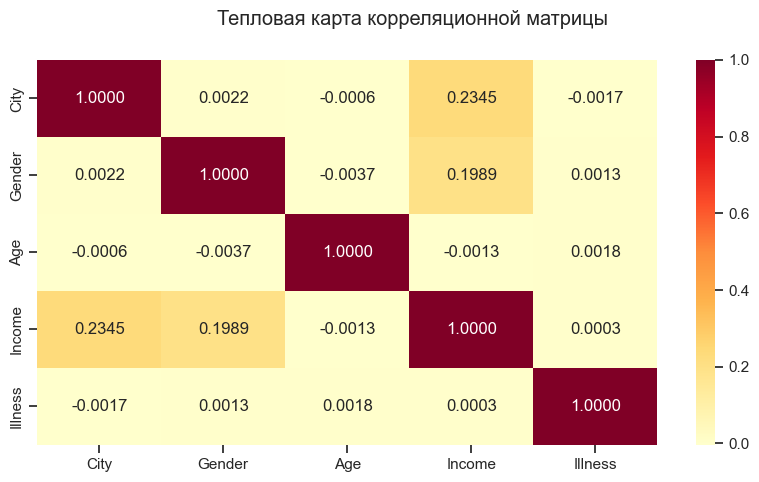

In [32]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Тепловая карта корреляционной матрицы')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.4f', cmap="YlOrRd")

### На основе матрицы корреляции можно сделать следующие выводы:
### 1) Целевой признак наиболее сильно коррелирует с доходом ("Income", 0.20)
### 2) Целевой признак слабо коррелирует c городом ("City", 0.0022), возрастом ("Age", -0.0037) и болезнью ("Illness", 0.0013)
### 3)Наблюдается корреляция города ("City") с доходом ("Income") - 0.2345
### Сильно корреляции (>0.5) не наблюдается, значит все признаки можно оставить в модели.

In [34]:
cities = {
0: 'Austin',
1: 'Boston',
2: 'Dallas',
3: 'Los Angeles',
4: 'Mountain View',
5: 'New York City',
6: 'San Diego',
7: 'Washington D.C.',
}
data['City'] = data['City'].replace(cities)

genders = {
0: 'Male',
1: 'Female',
}
data['Gender'] = data['Gender'].replace(genders)

Проверим, что данные трансформировались


In [36]:
data.head()

,City,Gender,Age,Income,Illness
0,Dallas,Female,41,40367.0,0
1,Dallas,Female,54,45084.0,0
2,Dallas,Female,42,52483.0,0
3,Dallas,Female,40,40941.0,0
4,Dallas,Female,46,50289.0,0


## Построим диаграмму jointplot

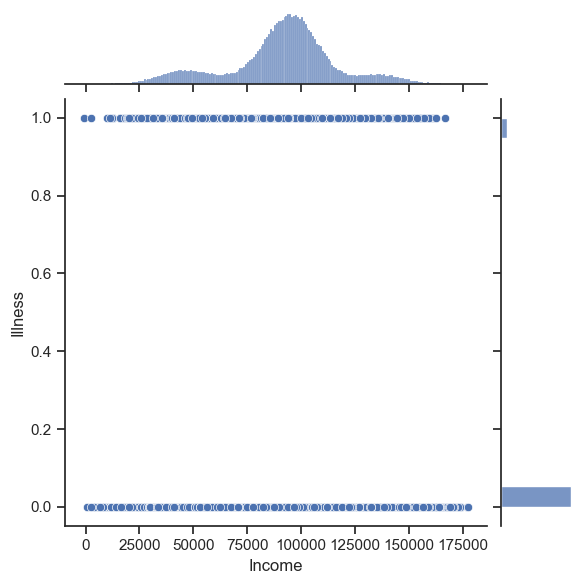

In [38]:
column1 = 'Income'
column2 = 'Illness'

# Построим график "Jointplot"
sns.jointplot(x=column1, y=column2, data=data, kind='scatter')
plt.show()